# Data Exploration and Preprocessing Lab  
**Name:** Unique Karanjit  
**Course Title:**  Advanced Big Data and Data Mining (MSCS-634-M40)  
**Lab Assignment Title:** Data Visualization, Preprocessing & Statistical Analysis Lab  


In [ ]:
pip install pandas matplotlib seaborn numpy scikit-learn

In [3]:
import pandas as pd

# Read the csv data file with pandas. 

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')  # Replace with your actual file path or URL
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,NaN,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,101250425,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGAEE5M,NaN,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,224162858,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
3,5YJ3E1EBXN,King,Bellevue,WA,98004.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,219428079,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,JM3KKEHA8S,Thurston,Yelm,WA,98597.0,2025,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,2.0,277791643,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


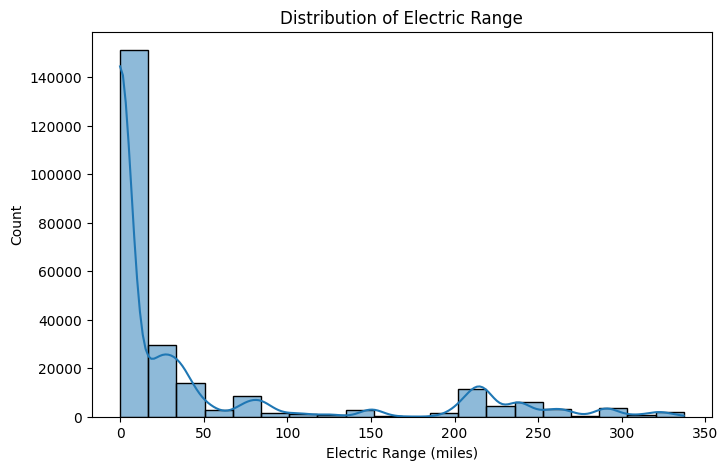

In [5]:
# Histogram: Distribution of Electric Range 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Electric Range"].dropna(), bins=20, kde=True)
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.show()



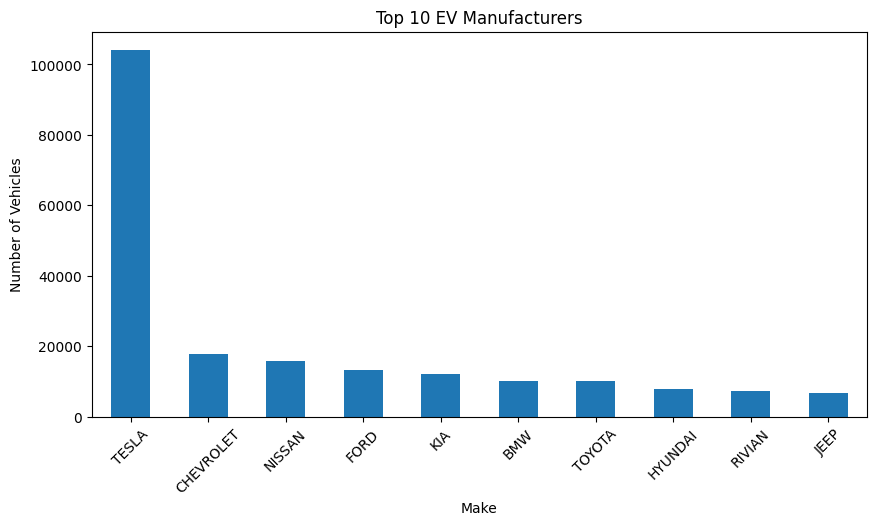

In [6]:
#Bar Chart: Count of Vehicle Makes
plt.figure(figsize=(10, 5))
df['Make'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 EV Manufacturers")
plt.ylabel("Number of Vehicles")
plt.xlabel("Make")
plt.xticks(rotation=45)
plt.show()


In [7]:
# Check missing values
df.isnull().sum()


VIN (1-10)                                             0
County                                                 6
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        17
Base MSRP                                             17
Legislative District                                 540
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [8]:
# Check for missing values, print the rows with empty value. 
nan_rows = df[df['County'].isna()]
print(nan_rows)


        VIN (1-10) County     City State  Postal Code  Model Year   Make  \
0       5YJ3E1EB6K    NaN  Seattle    WA      98178.0        2019  TESLA   
1       5YJYGAEE5M    NaN    Selah    WA      98942.0        2021  TESLA   
699     WBAJA9C50K    NaN      NaN    AE          NaN        2019    BMW   
214506  7JRBR0FM0N    NaN      NaN    BC          NaN        2022  VOLVO   
233134  5YJXCAE24H    NaN      NaN    BC          NaN        2017  TESLA   
244288  5YJ3E1EB2M    NaN      NaN    NS          NaN        2021  TESLA   

          Model                   Electric Vehicle Type  \
0       MODEL 3          Battery Electric Vehicle (BEV)   
1       MODEL Y          Battery Electric Vehicle (BEV)   
699        530E  Plug-in Hybrid Electric Vehicle (PHEV)   
214506      S60  Plug-in Hybrid Electric Vehicle (PHEV)   
233134  MODEL X          Battery Electric Vehicle (BEV)   
244288  MODEL 3          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibi

In [9]:
nan_count = df['County'].isna().sum()
print(f"There are {nan_count} rows in 'col1' with missing (NaN) values.")

There are 6 rows in 'col1' with missing (NaN) values.


In [10]:
# Fill missing values with mean (example)
df['County'] = df['County'].fillna('PLACEHOLDER_COUNTY')

# Drop rows missing VIN or Make
df.dropna(subset=['VIN (1-10)', 'Make'], inplace=True)

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,PLACEHOLDER_COUNTY,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,101250425,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGAEE5M,PLACEHOLDER_COUNTY,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,224162858,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
3,5YJ3E1EBXN,King,Bellevue,WA,98004.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,219428079,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,JM3KKEHA8S,Thurston,Yelm,WA,98597.0,2025,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,2.0,277791643,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


In [11]:
# Calculate IQR
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = df[(df['Electric Range'] < (Q1 - 1.5 * IQR)) | (df['Electric Range'] > (Q3 + 1.5 * IQR))]
print(outliers)

# Remove outliers
df = df[~((df['Electric Range'] < (Q1 - 1.5 * IQR)) | (df['Electric Range'] > (Q3 + 1.5 * IQR)))]
df.shape


In [ ]:
# Sample 0.1% (frac=0.001) of the DataFrame
df_sample = df.sample(frac=0.001, random_state=1)

# Counts before and after sampling
original_count = df.shape[0]
sample_count = df_sample.shape[0]

print(f"Original DataFrame has {original_count} rows.")
print(f"After sampling 0.1%, the sample contains {sample_count} rows.")


In [ ]:
df_reduced = df.drop(['Legislative District', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility','2020 Census Tract'], axis=1)


original_cols = df.columns.tolist()
reduced_cols = df_reduced.columns.tolist()

dropped_cols = list(set(original_cols) - set(reduced_cols))

print(f"Original DataFrame columns ({len(original_cols)}):")
print(f"  {original_cols}\n")

print(f"Dropped columns ({len(dropped_cols)}):")
print(f"  {dropped_cols}\n")

print(f"Remaining columns after dropping ({len(reduced_cols)}):")
print(f"  {reduced_cols}")


In [14]:
# Sample 10% of the data
df_sampled = df.sample(frac=0.1, random_state=1)
df_sampled.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
71455,1G1FY6S00P,King,Issaquah,WA,98029.0,2023,CHEVROLET,BOLT EUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,227402766,POINT (-122.00292 47.54748),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
90782,5YJSA1E66N,Kitsap,Port Orchard,WA,98366.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,273560990,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
190485,JTDKARFP7J,Whatcom,Bellingham,WA,98226.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,42.0,349588998,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
154049,KNDCR3L15S,Pierce,Gig Harbor,WA,98329.0,2025,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,276480739,POINT (-122.6658 47.38336),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
237275,1FTVW1EV2P,District of Columbia,Washington,DC,20003.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,230260271,POINT (-76.99953 38.88594),NON WASHINGTON STATE ELECTRIC UTILITY,1.100101e+10


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Scale Base MSRP
scaler = MinMaxScaler()
df_sampled['Scaled MSRP'] = scaler.fit_transform(df_sampled[['Base MSRP']])

# Discretize Electric Range
df_sampled['Range Category'] = pd.cut(df_sampled['Electric Range'], 
                                      bins=[0, 50, 150, 300, 500], 
                                      labels=["Short", "Medium", "Long", "Very Long"])

# Display the updated DataFrame
df_sampled[['Base MSRP', 'Scaled MSRP', 'Electric Range', 'Range Category']].head()


,Base MSRP,Scaled MSRP,Electric Range,Range Category
71455,0.0,0.0,0.0,NaN
90782,0.0,0.0,0.0,NaN
190485,0.0,0.0,25.0,Short
154049,0.0,0.0,0.0,NaN
237275,0.0,0.0,0.0,NaN


In [ ]:
df.info()
df.describe()


In [16]:
mean_range = df['Electric Range'].mean()
median_range = df['Electric Range'].median()
mode_range = df['Electric Range'].mode()[0]
min_range = df['Electric Range'].min()
max_range = df['Electric Range'].max()

print(f"Min: {min_range}, Max: {max_range}, Mean: {mean_range}, Median: {median_range}, Mode: {mode_range}")


Min: 0.0, Max: 337.0, Mean: 44.87219242645864, Median: 0.0, Mode: 0.0


In [17]:
range_ = max_range - min_range
q1 = df['Electric Range'].quantile(0.25)
q3 = df['Electric Range'].quantile(0.75)
iqr = q3 - q1
variance = df['Electric Range'].var()
std_dev = df['Electric Range'].std()

print(f"Range: {range_}, IQR: {iqr}, Variance: {variance}, Std Dev: {std_dev}")


Range: 337.0, IQR: 37.0, Variance: 6874.723486138684, Std Dev: 82.91395230079605


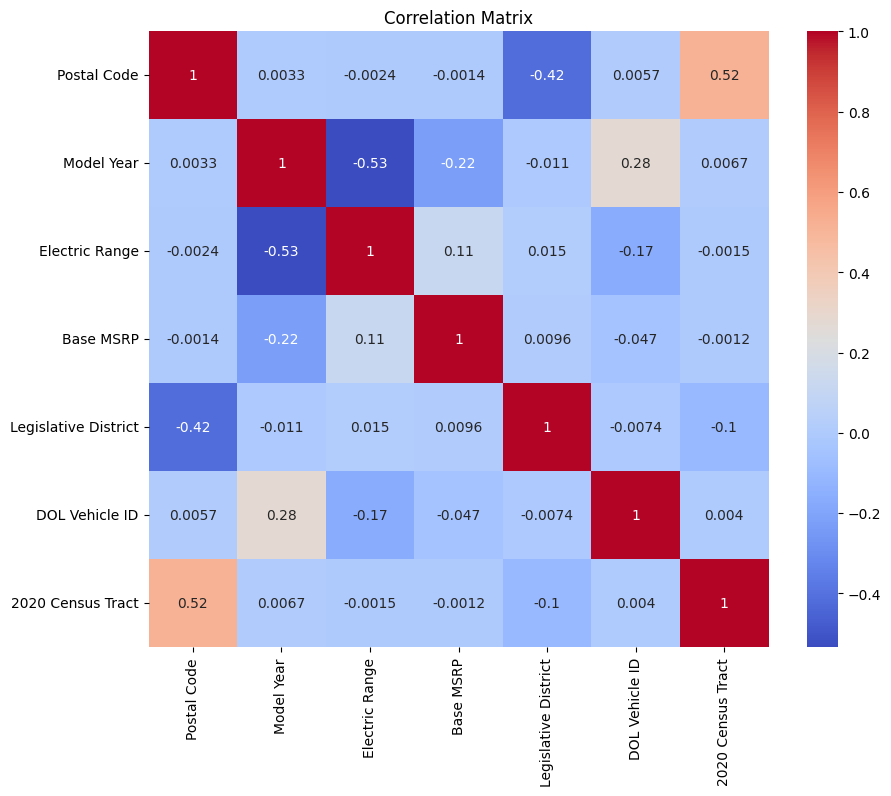

In [18]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
